# TODO
- 

### Load Data

In [1]:
import os, pandas as pd, numpy as np
%matplotlib inline
pd.set_option('max.columns', 500)

In [2]:
from backtest.data_load import create_historical_df, create_optimizer_df
from backtest.create_features import averages, lag, poly, dummy

In [3]:
link = './data/fantasy_nerd/'
date = '2019-01-28'

In [4]:
opt=create_optimizer_df(link, date)

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
hist = create_historical_df(link, date)

### Manipulate Historical Data

In [6]:
#These are the columns to manipulate

cols = [
        'Rest', 
        'PS', 
        'Opp_Pace', 
        'Opp_DEff', 
        'Opp_DvP',
        'L2_FGA', 
        'L5_FGA', 
        'S_FGA', 
        'L2_Min',
        'L5_Min', 
        'S_Min', 
        'L5_FP',
        'S_FP', 
        'Floor_FP', 
        'Ceil_FP',
        'Proj_Min', 
        'Proj_FP', 
        'Proj_Val',
        'Actual_Min',
        'Actual_Val',
        'Actual_FP'
    ]

In [7]:
hist = lag(hist, cols)

In [8]:
hist = averages(hist, cols)

In [9]:
hist = poly(hist, 3)

In [10]:
hist = dummy(hist)

### Make Predictions

In [11]:
from sklearn.linear_model import Ridge

In [12]:
opt_cp = opt.copy()
hist_cp = hist.copy()
optimizer_df = pd.DataFrame(columns=[
            'Player_Name',
            'FDP_predicted',
            'Salary',
            'Pos',
            'Date',
            'FDP_error',
            'FDP_actual'    
])

for date in hist_cp.Date.unique():
    ### Load data upto date, make sure there is data available
    tmp_df = hist_cp[hist_cp.Date <= date].dropna()
    
    if tmp_df[tmp_df.Date < date].shape[0] == 0:
        continue
    
    ### Create X, y data to train
    X = tmp_df[tmp_df.Date < date].drop(columns=['Date', 'Player_Name', 'Pos']+cols)
    y = tmp_df[tmp_df.Date < date]['Actual_FP']
    
    ###############################################
    ####################   MODEL BUILDLING
    ###############################################
    linear = Ridge()
    linear.fit(X, y)
    
    preds_df = tmp_df[tmp_df.Date == date]
    if preds_df.shape[0] == 0:
        continue
        
    preds = linear.predict(preds_df.drop(columns=['Date', 'Player_Name', 'Pos']+cols))
    preds_df['FDP_predicted'] = preds
    preds_df['FDP_error'] = preds_df['Actual_FP'] - preds_df['FDP_predicted']
    
    preds_df.rename(columns={'Actual_FP': 'FDP_actual'}, inplace=True)
    
    optimizer_df = optimizer_df.append(
        preds_df[[
            'Player_Name',
            'FDP_predicted',
            'Salary',
            'Pos',
            'Date',
            'FDP_error',
            'FDP_actual'
        ]]
    )

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.53561e-27): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.39691e-27): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=5.86304e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.63909e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.72268e-27): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.8809e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.87679e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.68334e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.561e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.43841e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.02333e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.10969e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.3856e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.89613e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.28142e-28): result may not be accurate.
  overwrite_a=True).T
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/c/Users/william.raikes/Desktop/personal/fantasy/venv/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt

### Backtest Results

In [13]:
from backtest.backtest import Optimizer, Backtest

In [14]:
o = Optimizer(optimizer_df)

In [15]:
b = Backtest(o)

In [16]:
b.create_backtest_df()

In [18]:
b.backtest_df

,players_2018-10-23,FDP_predicted_2018-10-23,FDP_actual_2018-10-23,players_2018-10-24,FDP_predicted_2018-10-24,FDP_actual_2018-10-24,players_2018-10-25,FDP_predicted_2018-10-25,FDP_actual_2018-10-25,players_2018-10-26,FDP_predicted_2018-10-26,FDP_actual_2018-10-26,players_2018-10-27,FDP_predicted_2018-10-27,FDP_actual_2018-10-27,players_2018-10-28,FDP_predicted_2018-10-28,FDP_actual_2018-10-28,players_2018-10-29,FDP_predicted_2018-10-29,FDP_actual_2018-10-29,players_2018-10-30,FDP_predicted_2018-10-30,FDP_actual_2018-10-30,players_2018-10-31,FDP_predicted_2018-10-31,FDP_actual_2018-10-31,players_2018-11-01,FDP_predicted_2018-11-01,FDP_actual_2018-11-01,players_2018-11-02,FDP_predicted_2018-11-02,FDP_actual_2018-11-02,players_2018-11-03,FDP_predicted_2018-11-03,FDP_actual_2018-11-03,players_2018-11-04,FDP_predicted_2018-11-04,FDP_actual_2018-11-04,players_2018-11-05,FDP_predicted_2018-11-05,FDP_actual_2018-11-05,players_2018-11-06,FDP_predicted_2018-11-06,FDP_actual_2018-11-06,players_2018-11-07,FDP_predicted_2018-11-07,FDP_actual_2018-11-07,players_2018-11-08,FDP_predicted_2018-11-08,FDP_actual_2018-11-08,players_2018-11-09,FDP_predicted_2018-11-09,FDP_actual_2018-11-09,players_2018-11-10,FDP_predicted_2018-11-10,FDP_actual_2018-11-10,players_2018-11-11,FDP_predicted_2018-11-11,FDP_actual_2018-11-11,players_2018-11-12,FDP_predicted_2018-11-12,FDP_actual_2018-11-12,players_2018-11-13,FDP_predicted_2018-11-13,FDP_actual_2018-11-13,players_2018-11-14,FDP_predicted_2018-11-14,FDP_actual_2018-11-14,players_2018-11-15,FDP_predicted_2018-11-15,FDP_actual_2018-11-15,players_2018-11-16,FDP_predicted_2018-11-16,FDP_actual_2018-11-16,players_2018-11-17,FDP_predicted_2018-11-17,FDP_actual_2018-11-17,players_2018-11-18,FDP_predicted_2018-11-18,FDP_actual_2018-11-18,players_2018-11-19,FDP_predicted_2018-11-19,FDP_actual_2018-11-19,players_2018-11-20,FDP_predicted_2018-11-20,FDP_actual_2018-11-20,players_2018-11-21,FDP_predicted_2018-11-21,FDP_actual_2018-11-21,players_2018-11-23,FDP_predicted_2018-11-23,FDP_actual_2018-11-23,players_2018-11-24,FDP_predicted_2018-11-24,FDP_actual_2018-11-24,players_2018-11-25,FDP_predicted_2018-11-25,FDP_actual_2018-11-25,players_2018-11-26,FDP_predicted_2018-11-26,FDP_actual_2018-11-26,players_2018-11-27,FDP_predicted_2018-11-27,FDP_actual_2018-11-27,players_2018-11-28,FDP_predicted_2018-11-28,FDP_actual_2018-11-28,players_2018-11-29,FDP_predicted_2018-11-29,FDP_actual_2018-11-29,players_2018-11-30,FDP_predicted_2018-11-30,FDP_actual_2018-11-30,players_2018-12-01,FDP_predicted_2018-12-01,FDP_actual_2018-12-01,players_2018-12-02,FDP_predicted_2018-12-02,FDP_actual_2018-12-02,players_2018-12-03,FDP_predicted_2018-12-03,FDP_actual_2018-12-03,players_2018-12-04,FDP_predicted_2018-12-04,FDP_actual_2018-12-04,players_2018-12-05,FDP_predicted_2018-12-05,FDP_actual_2018-12-05,players_2018-12-06,FDP_predicted_2018-12-06,FDP_actual_2018-12-06,players_2018-12-07,FDP_predicted_2018-12-07,FDP_actual_2018-12-07,players_2018-12-08,FDP_predicted_2018-12-08,FDP_actual_2018-12-08,players_2018-12-09,FDP_predicted_2018-12-09,FDP_actual_2018-12-09,players_2018-12-10,FDP_predicted_2018-12-10,FDP_actual_2018-12-10,players_2018-12-11,FDP_predicted_2018-12-11,FDP_actual_2018-12-11,players_2018-12-12,FDP_predicted_2018-12-12,FDP_actual_2018-12-12,players_2018-12-13,FDP_predicted_2018-12-13,FDP_actual_2018-12-13,players_2018-12-14,FDP_predicted_2018-12-14,FDP_actual_2018-12-14,players_2018-12-15,FDP_predicted_2018-12-15,FDP_actual_2018-12-15,players_2018-12-16,FDP_predicted_2018-12-16,FDP_actual_2018-12-16,players_2018-12-17,FDP_predicted_2018-12-17,FDP_actual_2018-12-17,players_2018-12-18,FDP_predicted_2018-12-18,FDP_actual_2018-12-18,players_2018-12-19,FDP_predicted_2018-12-19,FDP_actual_2018-12-19,players_2018-12-21,FDP_predicted_2018-12-21,FDP_actual_2018-12-21,players_2018-12-22,FDP_predicted_2018-12-22,FDP_actual_2018-12-22,players_2018-12-23,FDP_predicted_2018-12-23,FDP_actual_2018-12-23,players_2018-12-25,FDP_predicted_2018-1

In [19]:
b.backtest_results()

In [20]:
b.results

,actual_sum,error,predicted_sum
2018-10-23,324.4,-34.354382,358.754382
2018-10-24,277.1,-213.332256,490.432256
2018-10-25,275.4,-18.137799,293.537799
2018-10-26,314.2,-15.818528,330.018528
2018-10-27,389.6,16.119645,373.480355
2018-10-28,330.9,-19.001425,349.901425
2018-10-29,416.7,25.904069,390.795931
2018-10-30,320.1,-201.283214,521.383214
2018-10-31,393.9,1.411239,392.488761
2018-11-01,325.2,-0.188894,325.388894


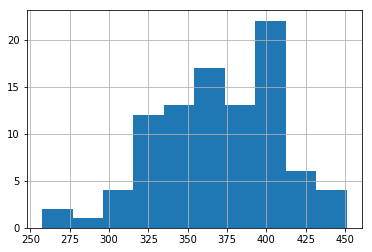

In [21]:
b.results.actual_sum.hist()

In [22]:
b.results.actual_sum.mean()

369.20531914893627

## Make New Predictions
2019-01-28 

In [156]:
test = pd.read_csv('./data/predictions/FanDuel-NBA-2019-01-28-32353-players-list.csv')

In [157]:
arrange = X.columns

In [158]:
test.loc[:, 'Home'] = np.where(test['Game'].str.split('@').str[-1]==test['Opponent'], 0, 1)
test = test[test['Injury Indicator'].isnull()]
test = test[['Position', 'Nickname', 'Salary', 'Team', 'Opponent', 'Home']]

test.rename(columns={
    'Nickname': 'Player_Name',
    'Position': 'Pos',
    'Opponent': 'Opp'
}, inplace=True)

In [159]:
test['Team'] = np.where(test['Team'] == 'GS', 'GSW', test['Team'])
test['Opp'] = np.where(test['Opp'] == 'GS', 'GSW', test['Opp'])
test['Team'] = np.where(test['Team'] == 'NY', 'NYK', test['Team'])
test['Opp'] = np.where(test['Opp'] == 'NY', 'NYK', test['Opp'])

In [160]:
test.head()

,Pos,Player_Name,Salary,Team,Opp,Home
0,C,Nikola Jokic,11400,DEN,MEM,0
1,PG,Kyrie Irving,10500,BOS,BKN,1
2,SF,Kevin Durant,9800,GSW,IND,0
3,PG,Stephen Curry,9600,GSW,IND,0
5,SG,D'Angelo Russell,8400,BKN,BOS,0


In [161]:
hist_test = hist.sort_values(by='Date').groupby('Player_Name').last().reset_index()

In [162]:
dummies = pd.get_dummies(test, columns=['Opp'])

In [163]:
test = test.merge(hist_test, how='left', on=['Player_Name', 'Pos'], copy=False, suffixes=['', '_discard'])

In [164]:
test.iloc[:, 873:] = 0

In [165]:
test = test.merge(dummies, on=['Player_Name', 'Pos', 'Salary', 'Team'], copy=False, suffixes=['_discard', ''])

In [166]:
test = test.drop(columns=[x for x in test.columns if '_discard' in x])

In [167]:
for col in test.columns:
    if col not in X.columns and col not in cols:
        print(col)

Pos
Player_Name
Team
Opp
Date


In [168]:
test = test.dropna()

In [169]:
test['FDP_predicted'] = linear.predict(test.drop(columns=['Date', 'Player_Name', 'Pos', 'Team', 'Opp']+cols)[arrange])

In [170]:
test = test[['Player_Name', 'FDP_predicted', 'Salary', "Pos"]]

In [171]:
t = Optimizer(test)

In [172]:
names = t.optimize().Player_Name

In [173]:
names

0        Nikola Jokic
1      Draymond Green
2            Ed Davis
3        Kyrie Irving
4    Patrick Beverley
5        Kevin Durant
6         Theo Pinson
7       Avery Bradley
8      Damyean Dotson
Name: Player_Name, dtype: object

### Test Run

In [274]:
test = test[test.Inj.isnull()]
test['Date'] = '2018-11-05'
test.drop(columns='Inj', inplace=True)
test.rename(columns={'Player Name': "Player_Name"}, inplace=True)

In [275]:
test['Home'] = np.where(
    test['Opp'].str.contains('@'), 
    1, 
    0
)

test['Opp'] = test['Opp'].str.replace('@', '')

In [276]:
dummies = pd.get_dummies(test, columns=['Opp'])

In [277]:
hist_test = hist.sort_values(by='Date').groupby('Player_Name').last().reset_index()

In [278]:
test = test.merge(hist_test, on=['Player_Name', 'Pos'], copy=False, suffixes=['', '_second'])

In [279]:
test = test.drop(columns=[x for x in test.columns if '_second' in x])

In [280]:
for col in test.columns:
    if 'Opp' in col and col in dummies.columns:
        test[col] = dummies[col]

In [281]:
test = test.dropna()

In [282]:
test['FDP_predicted'] = linear.predict(test.drop(columns=['Date', 'Player_Name', 'Pos','Team','Opp']+cols))

In [283]:
test = test[['Player_Name', 'FDP_predicted', 'Salary', "Pos"]]

In [285]:
t = Optimizer(test)

In [286]:
names = t.optimize().Player_Name

In [287]:
names

0          Enes Kanter
1        Blake Griffin
2           Taj Gibson
3          George Hill
4         Jamal Murray
5         Kevin Durant
6        Mario Hezonja
7    Langston Galloway
8          Zach LaVine
Name: Player_Name, dtype: object

In [305]:
hist[
    (hist.Date == '2018-11-05') & 
    (hist.Player_Name.isin(names))
][['Player_Name', 'Actual_FP']]

,Player_Name,Actual_FP
4599,Kevin Durant,41.2
4605,Blake Griffin,51.5
4617,Zach LaVine,58.8
4626,Jamal Murray,55.0
4635,Enes Kanter,61.3
4698,Taj Gibson,36.3
4710,George Hill,45.8
4772,Mario Hezonja,28.2
4836,Langston Galloway,41.8


In [304]:
hist[
    (hist.Date == '2018-11-05') & 
    (hist.Player_Name.isin(names))
][['Player_Name', 'Actual_FP']].sum()

Player_Name    Kevin DurantBlake GriffinZach LaVineJamal Murr...
Actual_FP                                                  419.9
dtype: object